In [54]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing scikit learn libraries for data *preprocessing*
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#from imblearn.under_sampling import RandomUnderSampler

# importing scikit learn libraries for model fitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# importing scikit learn libraries for *metrics* evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import datetime6lkj
pd.options.mode.chained_assignment = None

In [55]:
WW_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter = ';') #, header = None) # could have .json etc
RW_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter = ';') # header = None if no columns given

In [56]:
WW_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
# headers = ["sfdf", "sdf" .....]
# df.columns = headers

In [58]:
RW_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [59]:
RW_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
WW_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Data wrangling
1) Missing Values: (?, N/A or empty cell)
Use replace:  df.replace() : change abitrary (like ?) to np.nan

numeric: replace by mean or median:

categorical: replace by: df[column].value_counts().idxmax()


drop the entry:   df.dropna(subset = [...]., axis =0/1 (rows/ columns), inplace = True ), 

fillna()

df[[column]]astype(data_type): float: 

In [61]:
WW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [62]:
WW_df['type'] = 'white'
RW_df['type'] = 'red'

In [63]:
df_wines = pd.concat([WW_df, RW_df])
df_wines = df_wines.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [64]:
df_wines.to_csv("wines.csv")

In [65]:
df_wines['type'].value_counts().idxmax()

'red'

In [66]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,red
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,white
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,red
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,red
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,red


In [67]:
print(df_wines['quality'].unique())
df_wines['quality'].value_counts(sort = True, ascending = False)

[8 5 7 6 4 3 9]


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [68]:
print(df_wines['type'].value_counts())
df_wines['type'].value_counts().idxmax() # categorical values

red      4898
white    1599
Name: type, dtype: int64


'red'

<AxesSubplot:>

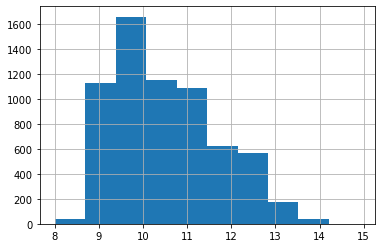

In [69]:
df_wines['alcohol'].hist()

In [70]:
# Binning

bins = [1, 5.5, 7.5, 10]
group = ['low', 'medium', 'high']
df_wines['quality_label'] = pd.cut(df_wines['quality'], bins = bins, labels = group)
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,red,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,white,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,red,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,red,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,red,medium


In [71]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [72]:
def with_hue(plot, feature, Number_of_categories,index, hue_categories):
    a = [p.get_height() for p in plot.patches]
    print(a)
    patch = [p for p in plot.patches]
    #print(patch)
    for i in range(Number_of_categories):
        total = feature.value_counts().values[index[i]]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10)
    plt.title('Wine Quality')    
    plt.xlabel('Quality Label')
    plt.ylabel('Number of wines')
    plt.show()

[1640, 3078, 180, 744, 837, 18]


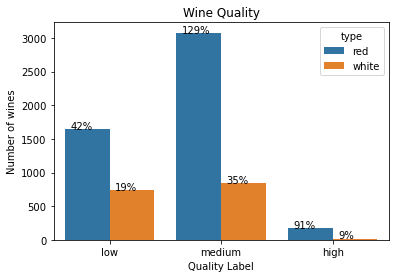

In [73]:
ax = sns.countplot(x = 'quality_label', order = ['low', 'medium', 'high'] ,hue= 'type' , data = df_wines)
#ax = sns.countplot(x = 'subscription_plan', order = ['1-month', '3-months', '6-months', '12-months', 'lifetime'], hue = 'had_trial_period' , data = df_for_subscription_counts)
order_index = [0,1,2]
with_hue(ax, df_wines.quality_label,3, order_index,2 )

In [74]:
df_wines.describe() # (include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


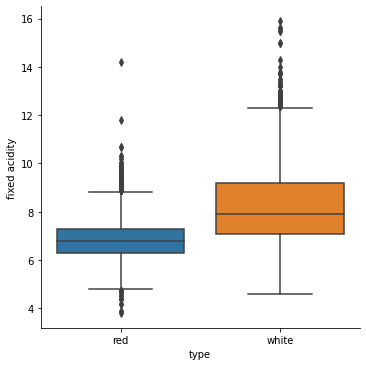

In [75]:
sns.catplot(x = 'type' , y = 'fixed acidity', data = df_wines, kind = 'box' )

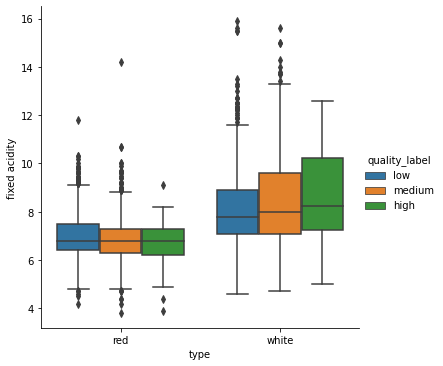

In [76]:
sns.catplot(x = 'type' , y = 'fixed acidity', hue = 'quality_label', data = df_wines, kind = 'box' )

### aggregates
groupby()

In [77]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,red,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,white,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,red,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,red,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,red,medium


In [88]:
df_group = df_wines.groupby(['type', 'quality_label'], as_index = False).mean() # as_index = False (arg in grpby)

In [89]:
df_group

,type,quality_label,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,low,6.961524,0.310265,0.334311,7.054451,0.051436,35.338720,148.597866,0.995160,3.170457,0.481506,9.849530,4.876220
1,red,medium,6.808236,0.261194,0.334480,6.082765,0.043209,35.214587,133.635802,0.993530,3.195832,0.494535,10.801966,6.285900
2,red,high,6.678333,0.277972,0.328167,5.628333,0.038011,36.627778,125.883333,0.992214,3.221167,0.485667,11.651111,8.027778
3,white,low,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
4,white,medium,8.472043,0.475239,0.297921,2.535066,0.082967,15.315412,39.479092,0.996494,3.311577,0.691004,10.828375,6.237754
5,white,high,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.000000


In [80]:
nice_group = df_group.pivot(index ='type', columns = 'quality_label')
nice_group

fixed acidity                     volatile acidity            \
quality_label           low    medium      high              low    medium   
type                                                                         
red                6.961524  6.808236  6.678333         0.310265  0.261194   
white              8.142204  8.472043  8.566667         0.589503  0.475239   

                        citric acid                     residual sugar  ...  \
quality_label      high         low    medium      high            low  ...   
type                                                                    ...   
red            0.277972    0.334311  0.334480  0.328167       7.054451  ...   
white          0.423333    0.237755  0.297921  0.391111       2.542070  ...   

                     pH sulphates                       alcohol             \
quality_label      high       low    medium      high       low     medium   
type                                                                         
red            3.221167  0.481506  0.494535  0.485667  9.849530  10.801966   
white          3.267222  0.618535  0.691004  0.767778  9.926478  10.828375   

                           quality                      
quality_label       high       low    medium      high  
type                                                    
red            11.651111  4.876220  6.285900  8.027778  
white          12.094444  4.901882  6.237754  8.000000  

[2 rows x 36 columns]

#### correlation
cancer <> smoking
rain <> unbrella

#### continuous

<AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>

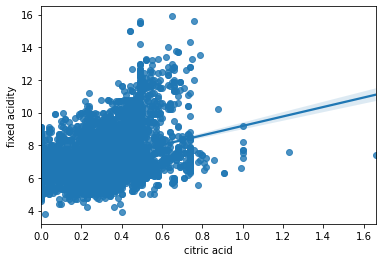

In [81]:
sns.regplot(x = 'citric acid', y = 'fixed acidity', data= df_wines)

In [82]:
pearson_coef, pval = stats.pearsonr(df_wines['citric acid'], df_wines['fixed acidity'])
print(pearson_coef, pval)

0.32443572544729815 4.185728463217734e-159


In [83]:
pearson_coef, pval = stats.pearsonr(df_wines['fixed acidity'], df_wines['volatile acidity'])
print(pearson_coef, pval)

0.2190082563509968 2.1368086276901813e-71


Hypothesis tests: means

In [84]:
from scipy.stats import ttest_1samp

print('Actual mean:', df_wines['fixed acidity'].mean())  

tstat, pval = ttest_1samp(df_wines['fixed acidity'].to_numpy(), 7.2)
print(tstat, pval)

Actual mean: 7.21530706479915
0.9516955157611723 0.3412868321568959


In [85]:
from scipy.stats import ttest_ind

# tstat, pval = ttest_ind(list1, list2)


In [86]:
# ANOVA : Analysis of variance
from scipy.stats import f_oneway

#stat, pval = f_oneway(list1, list2, list3)

#concat_values = np.concatenate([1,2,3])
#concat_labels = [label1, label2, label3]

from statsmodels.stats.multicomp
import pairwise_tukeyhsd

# tukey_r = pairwise_tukeyhsd(concat_values, concat_labels, 0.05)





SyntaxError: invalid syntax (<ipython-input-86-4a77aae16e32>, line 9)

In [ ]:
# proportion
from scipy.stats import binom_test

#pval = binom_test(test_case, sample_size, null_proportion)

Conditional: Normal ditribution
if Skewed: 

from scipy import stats
boxcox = stats.boxcox(df[column])[0]
f[column] = pd.Series(boxcox)


Std of samples must be equal and samples should be independent

In [ ]:
df_wines['fixed acidity'].mean()

In [ ]:

from scipy.stats import chi2_contingency

# multiple proportions X.shape = [row_case, column_case]
# chi2, pval, dof, expected = chi2_contingency(X)


In [ ]:
sns.residplot(df_wines['fixed acidity'], df_wines['volatile acidity'])

In [ ]:
#One hot encodeing


#df = pd.get_dummies(df_wines['type'])
# pd.concat([df_wines. df], axis = 1, inplace = True)
# pd.drop("type", axis = 1, inplace = True)

In [ ]:
le = LabelEncoder()
df_wines['quality_label'] = le.fit_transform(df_wines['quality_label'])
df_wines['type'] = le.fit_transform(df_wines['type'])

In [ ]:
df_wines.head()

In [ ]:
X = df_wines.drop(['quality', 'type', 'quality_label'], axis = 1)
y = df_wines['type']
# y = df_wines['quality_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [ ]:
df_wines['type'].value_counts()

In [ ]:
#rus = RandomUnderSampler(random_state=7)
#X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_traisc = StandardScaler()
sc.fit(X_train)
X_resampled = sc.transform(X_resampled)
X_test = sc.transform(X_test)

In [87]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
rfc = RandomForestClassifier()
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]
max_depth.append(None)

random_grid = {
               'max_features': max_features,
               'max_depth': max_depth}
print(random_grid)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rfc_random.fit(X_resampled, y_resampled)
rfc_random.best_params_
#rfc_random.score_
#rfc.fit(X_train, y_train)
#pred_rfc = rfc.predict(X_test)

In [ ]:
pred_rfc = rfc_random.best_estimator_.predict(X_test)


In [ ]:
max_depth = [int(x) for x in np.linspace(8, 14, num = 6)]
max_depth.append(None)
rf_grid = {
    'max_depth' : max_depth
}

rf_opt = GridSearchCV(estimator = rfc, param_grid = rf_grid, cv = 2, verbose=2, n_jobs = -1)
pprint(rf_grid)

In [ ]:

print(confusion_matrix(y_test, pred_rfc))
print("accuracy:" ,accuracy_score(y_test, pred_rfc))

In [ ]:
print(classification_report(y_test, pred_rfc))